In [10]:

import numpy as np
import cv2
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt


In [5]:
# Face detection model
faceDetectionModel = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'

# Mô tả kiến trúc
faceDetectionProto = 'deploy.prototxt.txt'

# Mô hình mô tả khuôn mặt
faceDescriptor = 'openface.nn4.small2.v1.t7'

# Sử dụng OpenCV DNN đọc mô hìn nhận diện khuôn mặt
dectectorModel = cv2.dnn.readNetFromCaffe(faceDetectionProto, faceDetectionModel)

# Đọc mô hình mô tả khuôn mặt từ file Torch
descriptorModel = cv2.dnn.readNetFromTorch(faceDescriptor)
     

In [7]:
# Danh sách hình ảnh chuẩn bị
faces = '/Users/ttdat/Documents/Do_An_Co_So/dữ liệu chính'
os.listdir(faces)

['Linh',
 'Quang',
 'Thăng Long',
 '.DS_Store',
 'Đức',
 'Luân',
 'Khôi',
 'Phú',
 'Dương',
 'Trường',
 'Nhật Tiến',
 'Tiến',
 'Xuân Hải',
 'Hà',
 'Duy Khôi',
 'Hưng',
 'Sang',
 'Quốc Anh',
 'Văn Tiến',
 'Phương',
 'Quân',
 'Nguyên',
 'Dũng',
 'Đạt',
 'Thanh Bình',
 'Lành',
 'Văn Mạnh',
 'Nghĩa',
 'Hiếu']

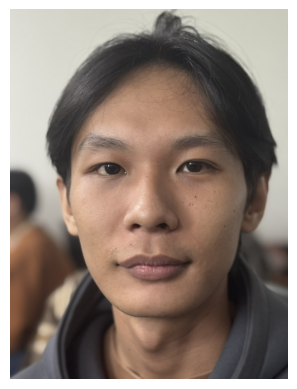

In [11]:


img = cv2.cvtColor(cv2.imread('/Users/ttdat/Documents/Do_An_Co_So/dữ liệu chính/Duy Khôi/khoi1.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

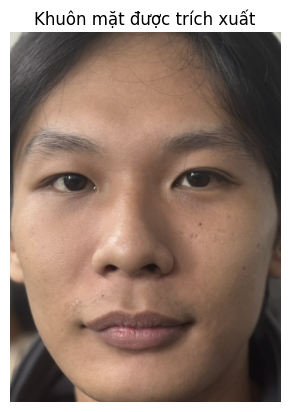

Vector đặc trưng (128-D):
[ 3.29918936e-02  1.22784644e-01  5.29122539e-02  1.82589352e-01
 -5.41298874e-02  1.05114765e-01  4.65992503e-02  2.35514753e-02
 -4.45984304e-02  1.17775217e-01  8.47401991e-02  4.75748517e-02
  4.13815025e-03 -1.35940775e-01  6.90127015e-02 -3.23225707e-02
  3.08489632e-02  1.04996346e-01  2.37472076e-02  3.03665884e-02
  8.57569464e-03 -1.31261826e-01  4.61802147e-02  3.52507718e-02
  9.65255052e-02 -1.49912745e-01 -1.10913739e-01 -8.51632506e-02
 -9.30608958e-02  5.05748615e-02  3.04893348e-02  6.61696419e-02
  1.63873229e-02  1.09197028e-01 -1.83484517e-02 -4.67393436e-02
  6.88038319e-02 -5.94523409e-03  4.61477935e-02 -1.05350548e-02
  1.36017594e-02 -1.08831234e-01  6.32118806e-02 -1.07768089e-01
 -9.55536589e-02 -2.12051317e-01  7.91928619e-02 -1.02905959e-01
 -1.66243985e-02  1.26912430e-01  2.08492339e-01 -2.64329147e-02
 -1.05417058e-01  6.61981404e-02  2.15692967e-02  3.13323699e-02
  8.88998713e-03 -1.16506524e-01  2.70962901e-02 -3.61757448e-05

In [13]:


# Đường dẫn ảnh
path = '/Users/ttdat/Documents/Do_An_Co_So/dữ liệu chính/Duy Khôi/khoi1.jpeg'

# Đọc ảnh
img = cv2.imread(path)
if img is None:
    raise FileNotFoundError("Không thể đọc ảnh từ đường dẫn.")

# Sao chép ảnh
image = img.copy()
h, w = image.shape[:2]

# Tạo blob cho mô hình phát hiện khuôn mặt
imgBlob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104, 177, 123), swapRB=False, crop=False)

# Thiết lập mô hình nhận diện khuôn mặt
dectectorModel.setInput(imgBlob)
detections = dectectorModel.forward()

# Kiểm tra có phát hiện khuôn mặt hay không
if detections.shape[2] > 0:
    # Chọn khuôn mặt có độ tin cậy cao nhất
    i = np.argmax(detections[0, 0, :, 2])
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:
        # Lấy tọa độ hộp bao quanh khuôn mặt
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype(int)

        # Trích xuất vùng khuôn mặt
        roi = image[startY:endY, startX:endX]

        # Hiển thị khuôn mặt đã cắt bằng matplotlib
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Khuôn mặt được trích xuất")
        plt.show()

        # Tạo blob cho mô hình đặc trưng khuôn mặt
        faceBlob = cv2.dnn.blobFromImage(roi, 1/255.0, (96, 96), (0, 0, 0), swapRB=True, crop=True)

        # Trích xuất đặc trưng
        descriptorModel.setInput(faceBlob)
        vectors = descriptorModel.forward()

        # In vector đặc trưng
        print("Vector đặc trưng (128-D):")
        print(vectors.flatten())
    else:
        print("Không có khuôn mặt nào đủ độ tin cậy (> 0.5).")
else:
    print("Không phát hiện được khuôn mặt nào trong ảnh.")

In [14]:
# Tạo ra một functions để áp dụng cho nhiều ảnh
def myDetect(image_path):
  # Trích xuất đặc trưng cho một ảnh
  img1 = cv2.imread(image_path)

  # Copy cái ảnh
  image = img1.copy()

  # Lấy chiều cao và chiều rộng của ảnh
  h, w = image.shape[:2]

  # Chuẩn bị dữ liệu đầu vào cho mô hình nhận diện khuôn mặt
  imgBlob = cv2.dnn.blobFromImage(image, 1, (300,300), (104, 177, 123), swapRB=False, crop=False)

  # Thiết lập đầu vào cho mô hình
  dectectorModel.setInput(imgBlob)

  # Thực hiện việc nhận diện khuôn mặt
  detections = dectectorModel.forward()

  # Kiểm tra xem có khuôn mặt nào hay không?
  if (len(detections)>0):
    # Chọn khuôn mặt có độ tin cậy cao nhất (confidence) cao nhất
    i = np.argmax(detections[0, 0, :, 2]) # Giá trị thứ 2 trong 7 giá trị cuối cùng => confidence
    confidence = detections[0, 0, i, 2]

    # Kiểm tra độ tin cậy có lớn hơn 0.5
    if (confidence>0.5):
        # Tính toán hộp bao quanh khuôn mặt
        box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
        (startX, startY, endX, endY) =box.astype('int')

        # Trích xuất vùng ảnh chứa khuôn mặt ra
        roi = image[startY:endY, startX:endX]
        # cv2_imshow(roi)

        # Chuẩn bị dữ liệu đầu vào cho mô hình trích xuất đặc trưng
        faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB=True, crop=True)

        # Thiết lập đầu vào cho mô hình
        descriptorModel.setInput(faceBlob)

        # Thực hiện việc trích xuất đặc trưng
        vectors = descriptorModel.forward()

        # Print vectors
        return vectors
     

In [16]:
# Khởi tạo dictionary lưu đặc trưng và nhãn
data = {'data': [], 'label': []}

# Đường dẫn gốc chứa các thư mục con
myDir = '/Users/ttdat/Documents/Do_An_Co_So/dữ liệu chính'

# Lặp qua từng thư mục (ứng với từng người)
for folder in os.listdir(myDir):
    path = os.path.join(myDir, folder)

    # Bỏ qua nếu không phải thư mục
    if not os.path.isdir(path):
        continue

    print("Đang xử lý thư mục:", folder)

    # Lặp qua từng file trong thư mục
    for fileName in os.listdir(path):
        filePath = os.path.join(path, fileName)

        # Bỏ qua nếu không phải ảnh
        if not fileName.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        try:
            # Gọi hàm trích xuất đặc trưng cho từng ảnh
            vector = myDetect(filePath)

            if vector is not None:
                data['data'].append(vector)
                data['label'].append(folder)
                print("Trích xuất thành công:", fileName)
            else:
                print("Không phát hiện khuôn mặt:", fileName)

        except Exception as e:
            print("Lỗi xử lý", fileName, ":", e)

Đang xử lý thư mục: Linh
Trích xuất thành công: crop_image_140.jpg
Trích xuất thành công: crop_image_1820.jpg
Trích xuất thành công: crop_image_1940.jpg
Trích xuất thành công: crop_image_960.jpg
Trích xuất thành công: crop_image_1000.jpg
Trích xuất thành công: crop_image_380.jpg
Trích xuất thành công: crop_image_60.jpg
Trích xuất thành công: crop_image_800.jpg
Trích xuất thành công: crop_image_1160.jpg
Trích xuất thành công: crop_image_180.jpg
Trích xuất thành công: crop_image_1360.jpg
Trích xuất thành công: crop_image_1200.jpg
Trích xuất thành công: crop_image_1980.jpg
Trích xuất thành công: crop_image_220.jpg
Trích xuất thành công: crop_image_340.jpg
Trích xuất thành công: crop_image_2320.jpg
Trích xuất thành công: crop_image_620.jpg
Trích xuất thành công: crop_image_2240.jpg
Trích xuất thành công: crop_image_740.jpg
Trích xuất thành công: crop_image_1760.jpg
Trích xuất thành công: crop_image_2080.jpg
Trích xuất thành công: crop_image_580.jpg
Trích xuất thành công: crop_image_1600.jp

In [17]:
data.keys()

dict_keys(['data', 'label'])

In [18]:

# Tạo một series từ dictionary
labelSeries = pd.Series(data['label'])
# Đếm số lần xuất hiện của mỗi nhãn
labelCounts = labelSeries.value_counts()
print(labelCounts)

Linh          118
Hiếu           79
Quang          67
Phương         58
Dương          52
Sang           38
Xuân Hải       38
Nguyên         30
Văn Mạnh       20
Lành           18
Đức            16
Thăng Long     16
Quân           14
Phú            14
Nghĩa          10
Luân            9
Tiến            8
Đạt            7
Duy Khôi        6
Văn Tiến        6
Dũng            6
Thanh Bình      6
Hưng            6
Hà              5
Nhật Tiến       5
Trường          4
Khôi            4
Quốc Anh        1
Name: count, dtype: int64


In [19]:


# Đường dẫn tới thư mục muốn lưu file
save_dir = '/Users/ttdat/Documents/Do_An_Co_So/đặc trưng'  # hoặc thư mục tùy bạn
os.makedirs(save_dir, exist_ok=True)  # Tạo thư mục nếu chưa có

# Tên file pickle để lưu
fileName = os.path.join(save_dir, 'data_face_features.pickle')

# Lưu dữ liệu
with open(fileName, 'wb') as f:
    pickle.dump(data, f)

print("Đã lưu xong vào:", fileName)

Đã lưu xong vào: /Users/ttdat/Documents/Do_An_Co_So/đặc trưng/data_face_features.pickle
